In [1]:
import qiskit
from qiskit import assemble, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from random import *
from qiskit import Aer
sim = Aer.get_backend("statevector_simulator")
import numpy as np
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.library import RZGate, RYGate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
from IPython.display import clear_output

In [2]:
df = pd.read_csv('FM Monte Carlo 4x4p iterations long3 random starting point.csv')
df

,Unnamed: 0,temp=0.01,temp=0.5,temp=1.0,temp=1.5,temp=2.0,temp=2.5,temp=3.0,temp=3.5,temp=4.0,...,temp=10.5,temp=11.0,temp=11.5,temp=12.0,temp=12.5,temp=13.0,temp=13.5,temp=14.0,temp=14.5,temp=15.0
0,0,0.750,0.875,0.375,0.625,0.250,0.625,0.125,0.250,0.375,...,0.500,0.375,0.625,1.000,0.875,1.000,0.250,0.875,0.250,1.000
1,1,0.750,0.875,0.500,0.625,0.375,0.500,0.250,0.250,0.375,...,0.375,0.500,0.625,0.875,0.750,0.875,0.125,0.875,0.125,0.875
2,2,0.750,0.875,0.625,0.750,0.375,0.375,0.375,0.125,0.375,...,0.250,0.375,0.500,0.750,0.625,0.750,0.250,0.750,0.250,0.875
3,3,0.750,0.875,0.625,0.875,0.250,0.375,0.375,0.250,0.250,...,0.250,0.250,0.625,0.625,0.625,0.625,0.375,0.625,0.375,0.875
4,4,0.875,0.875,0.625,0.875,0.250,0.375,0.250,0.375,0.250,...,0.250,0.375,0.500,0.500,0.500,0.625,0.250,0.500,0.375,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1.000,1.000,1.000,1.000,0.875,0.250,0.500,0.500,0.875,...,0.125,0.125,0.250,0.000,0.250,0.125,0.375,0.125,0.000,0.125
19996,19996,1.000,1.000,1.000,1.000,0.875,0.375,0.625,0.375,0.875,...,0.000,0.000,0.375,0.125,0.375,0.250,0.250,0.000,0.125,0.250
19997,19997,1.000,1.000,1.000,1.000,0.875,0.375,0.625,0.375,1.000,...,0.125,0.125,0.250,0.125,0.250,0.375,0.125,0.125,0.000,0.125
19998,19998,1.000,1.000,1.000,1.000,0.875,0.375,0.750,0.250,1.000,...,0.000,0.250,0.250,0.125,0.375,0.250,0.250,0.000,0.125,0.250


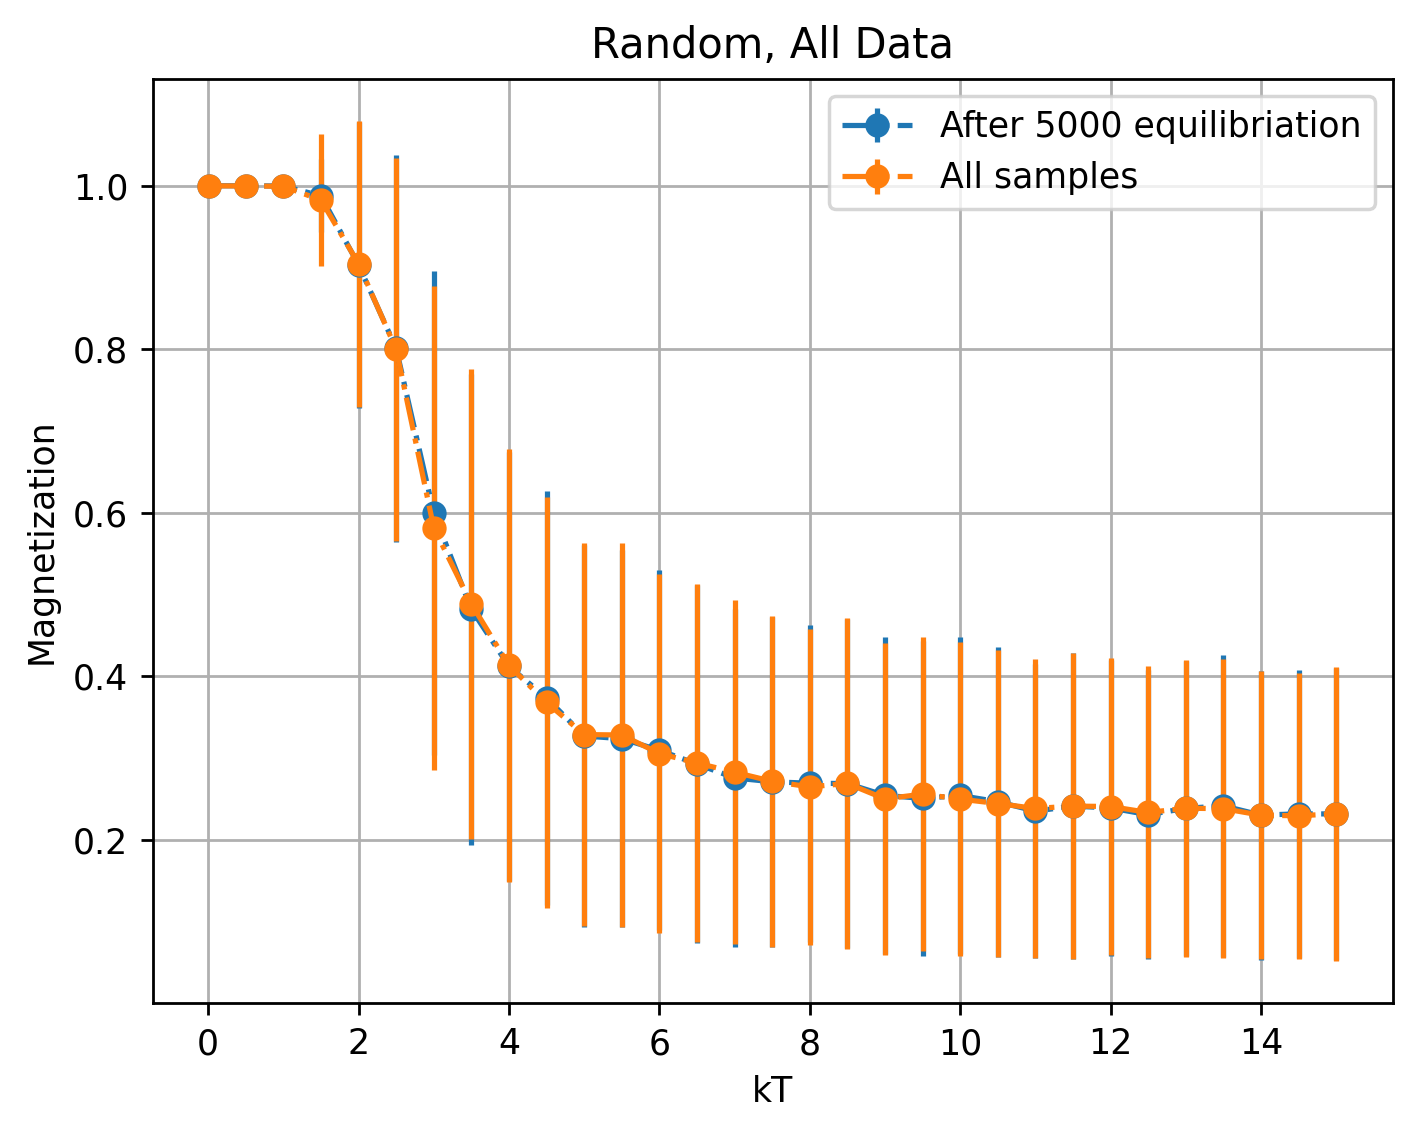

In [6]:
eqlb = 5000
keys = df.keys()[1:]
temps = np.linspace(0, 15, 31)
temps[0] = 0.01
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:]))
    std.append(np.std(df[key][eqlb:]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, All Data')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

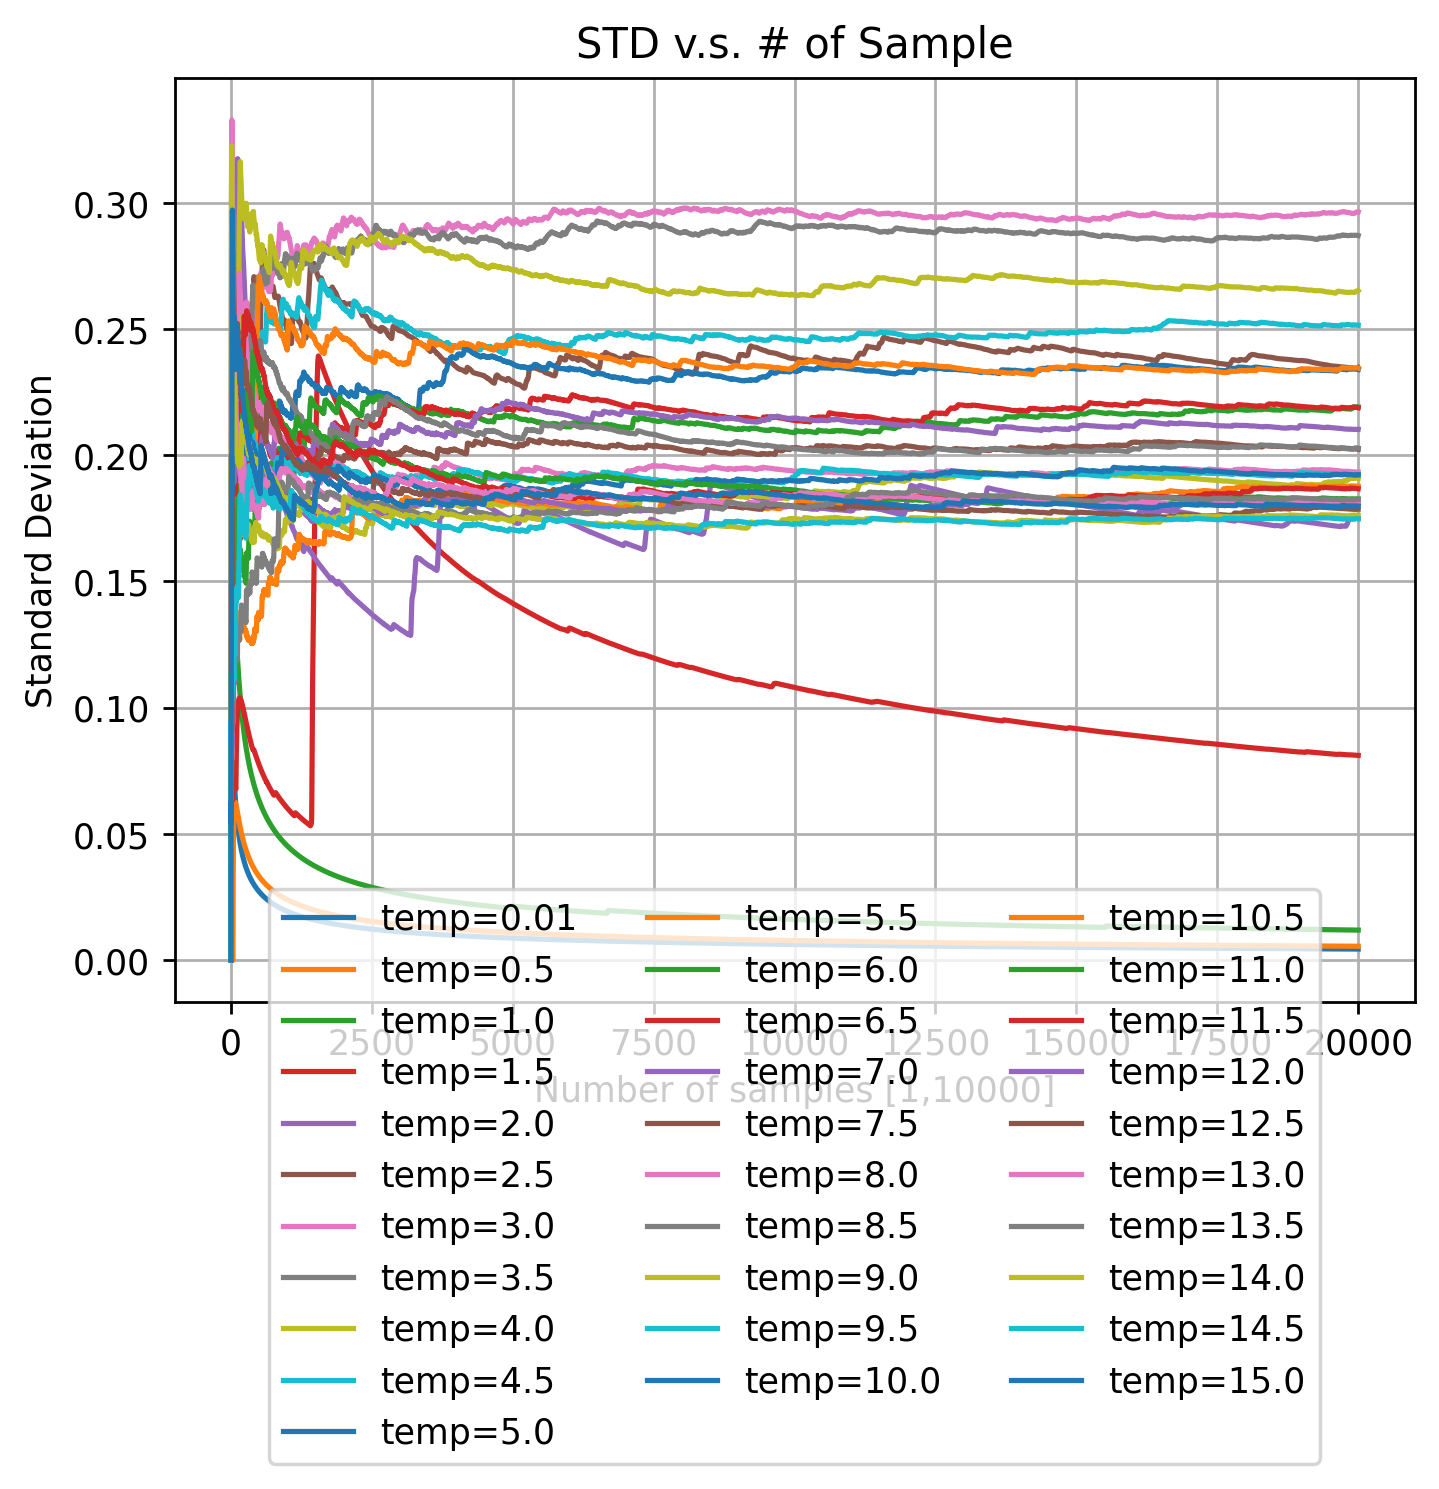

In [7]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

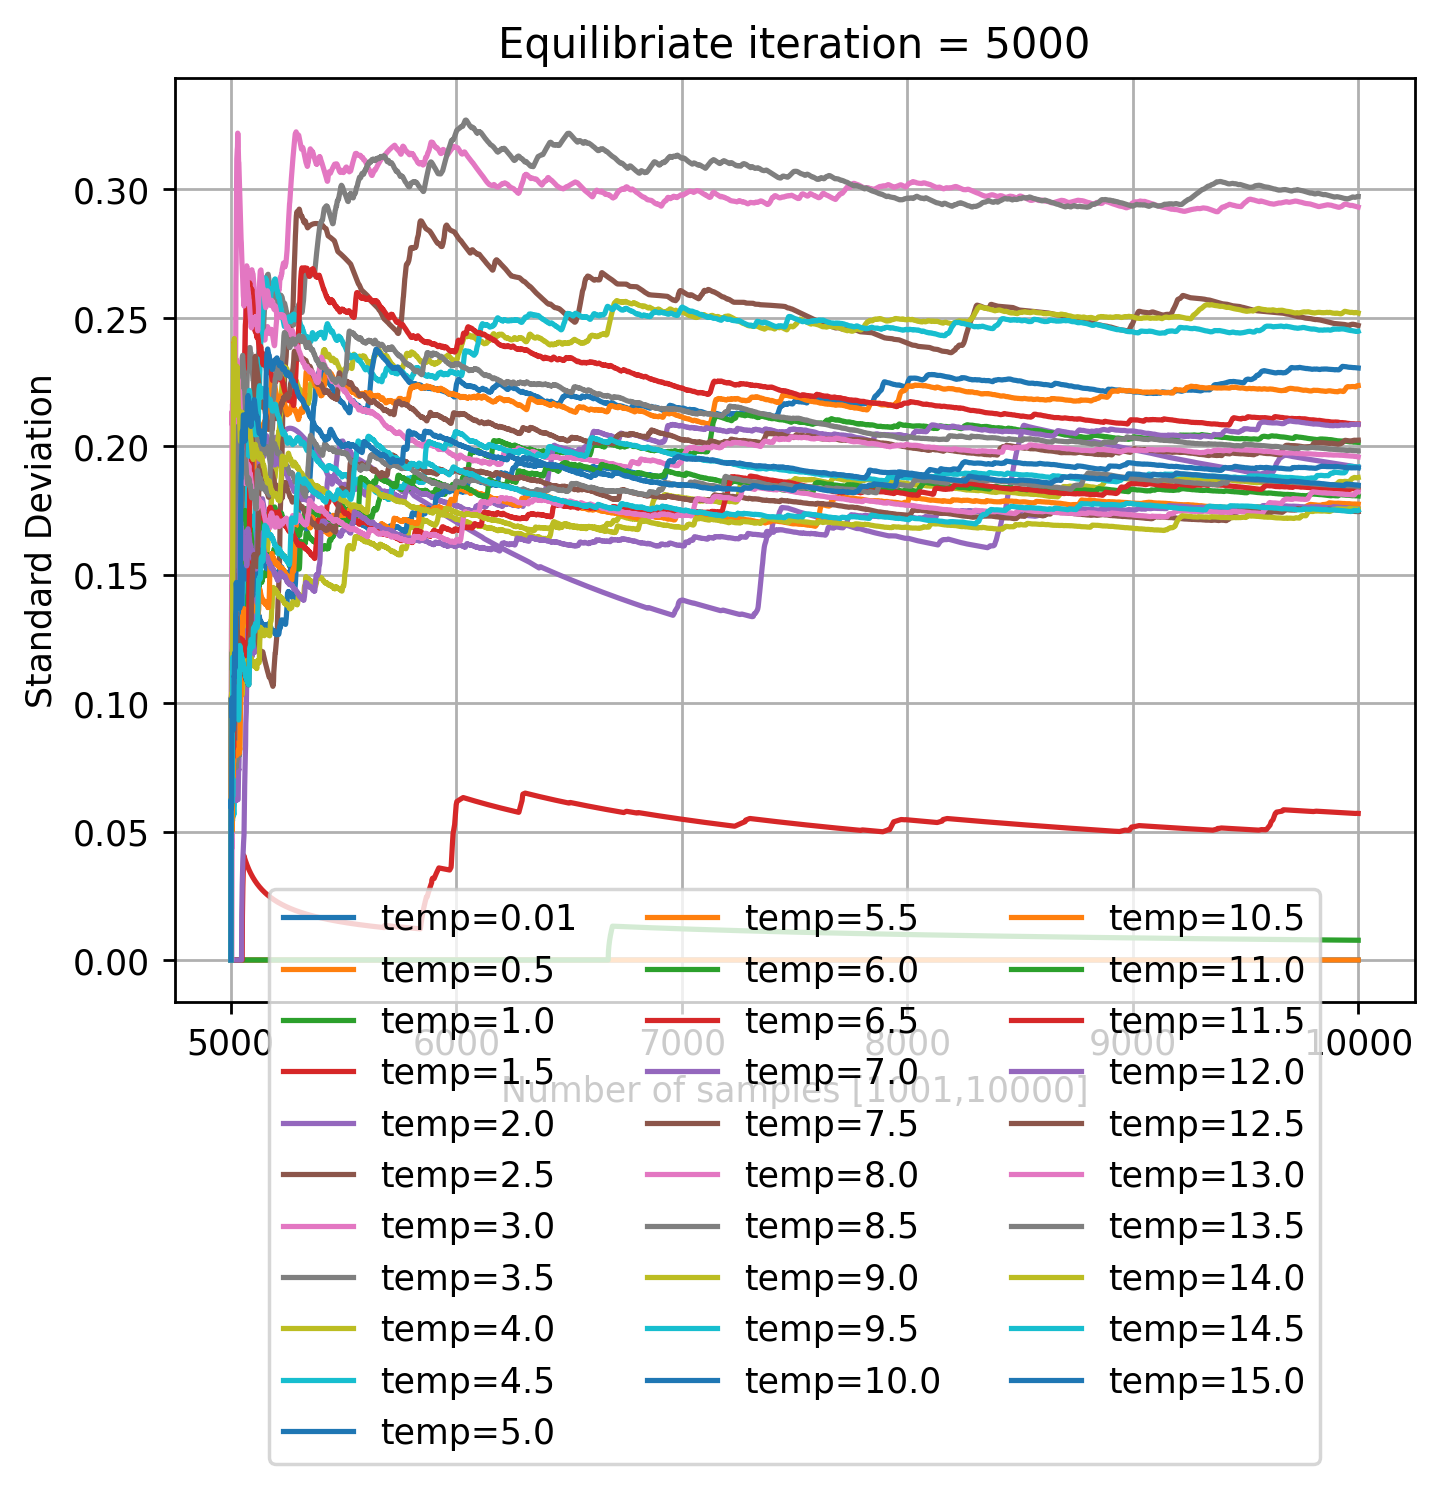

In [8]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb+1, 10000, 10000-eqlb).astype('int64')
for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[eqlb:i]) for i in samples]
    plt.plot(samples, std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

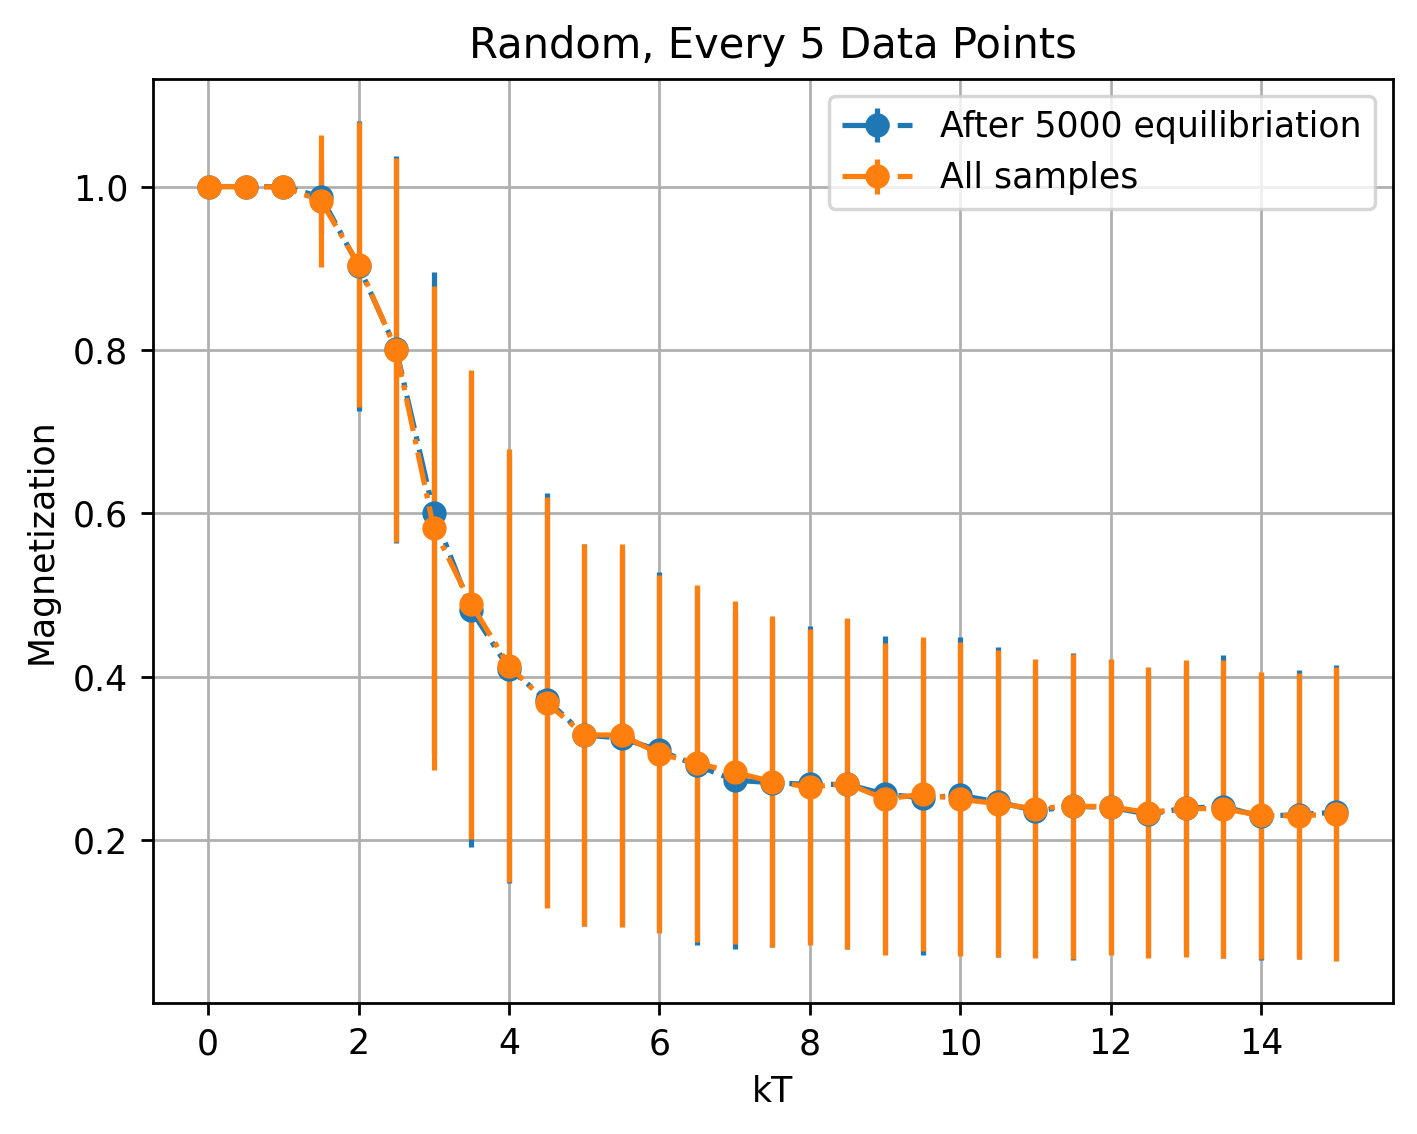

In [11]:
# Every 5th element
eqlb = 5000
keys = df.keys()[1:]
temps = np.linspace(0, 15, 31)
temps[0] = 0.01
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::5]))
    std.append(np.std(df[key][eqlb::5]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, Every 5 Data Points')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


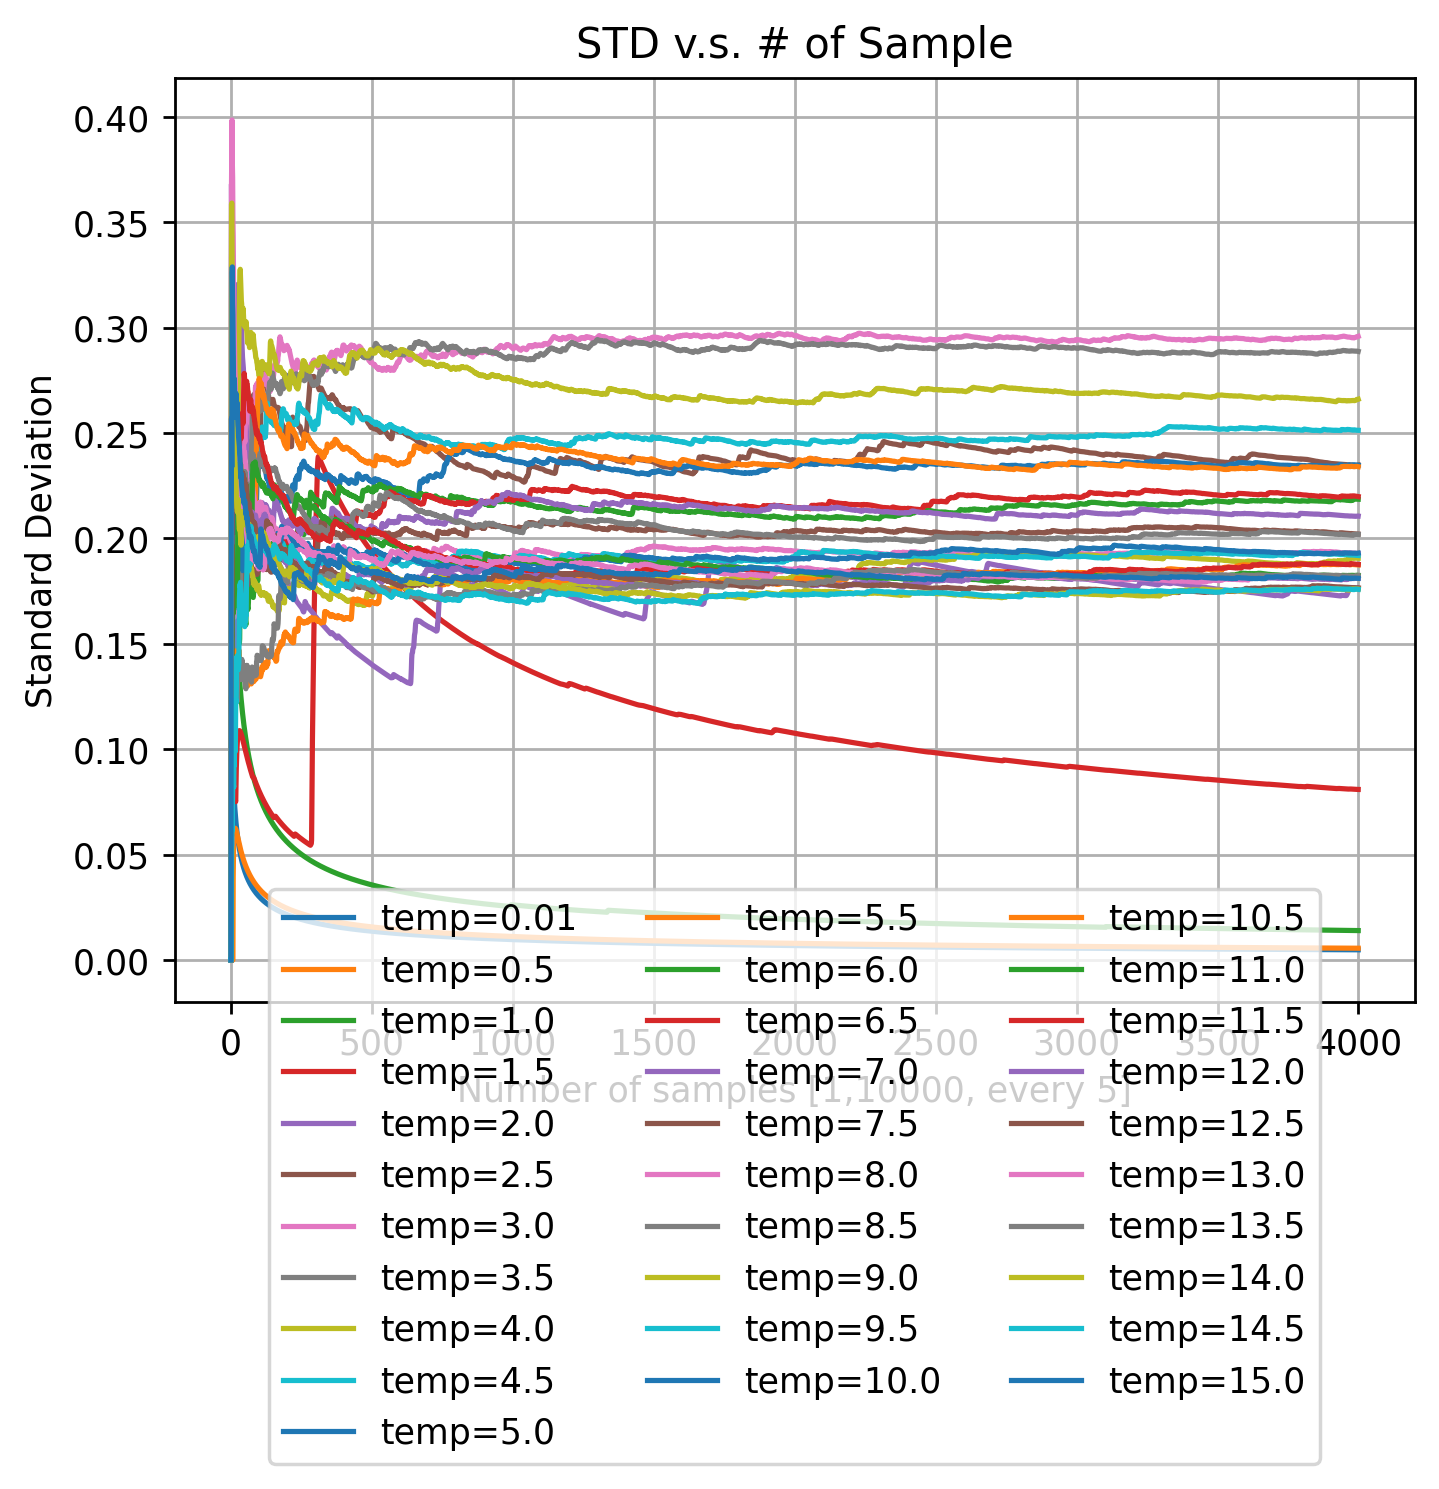

In [12]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::5].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmea

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmea

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmea

1000
1000


C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Youfu Qian\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


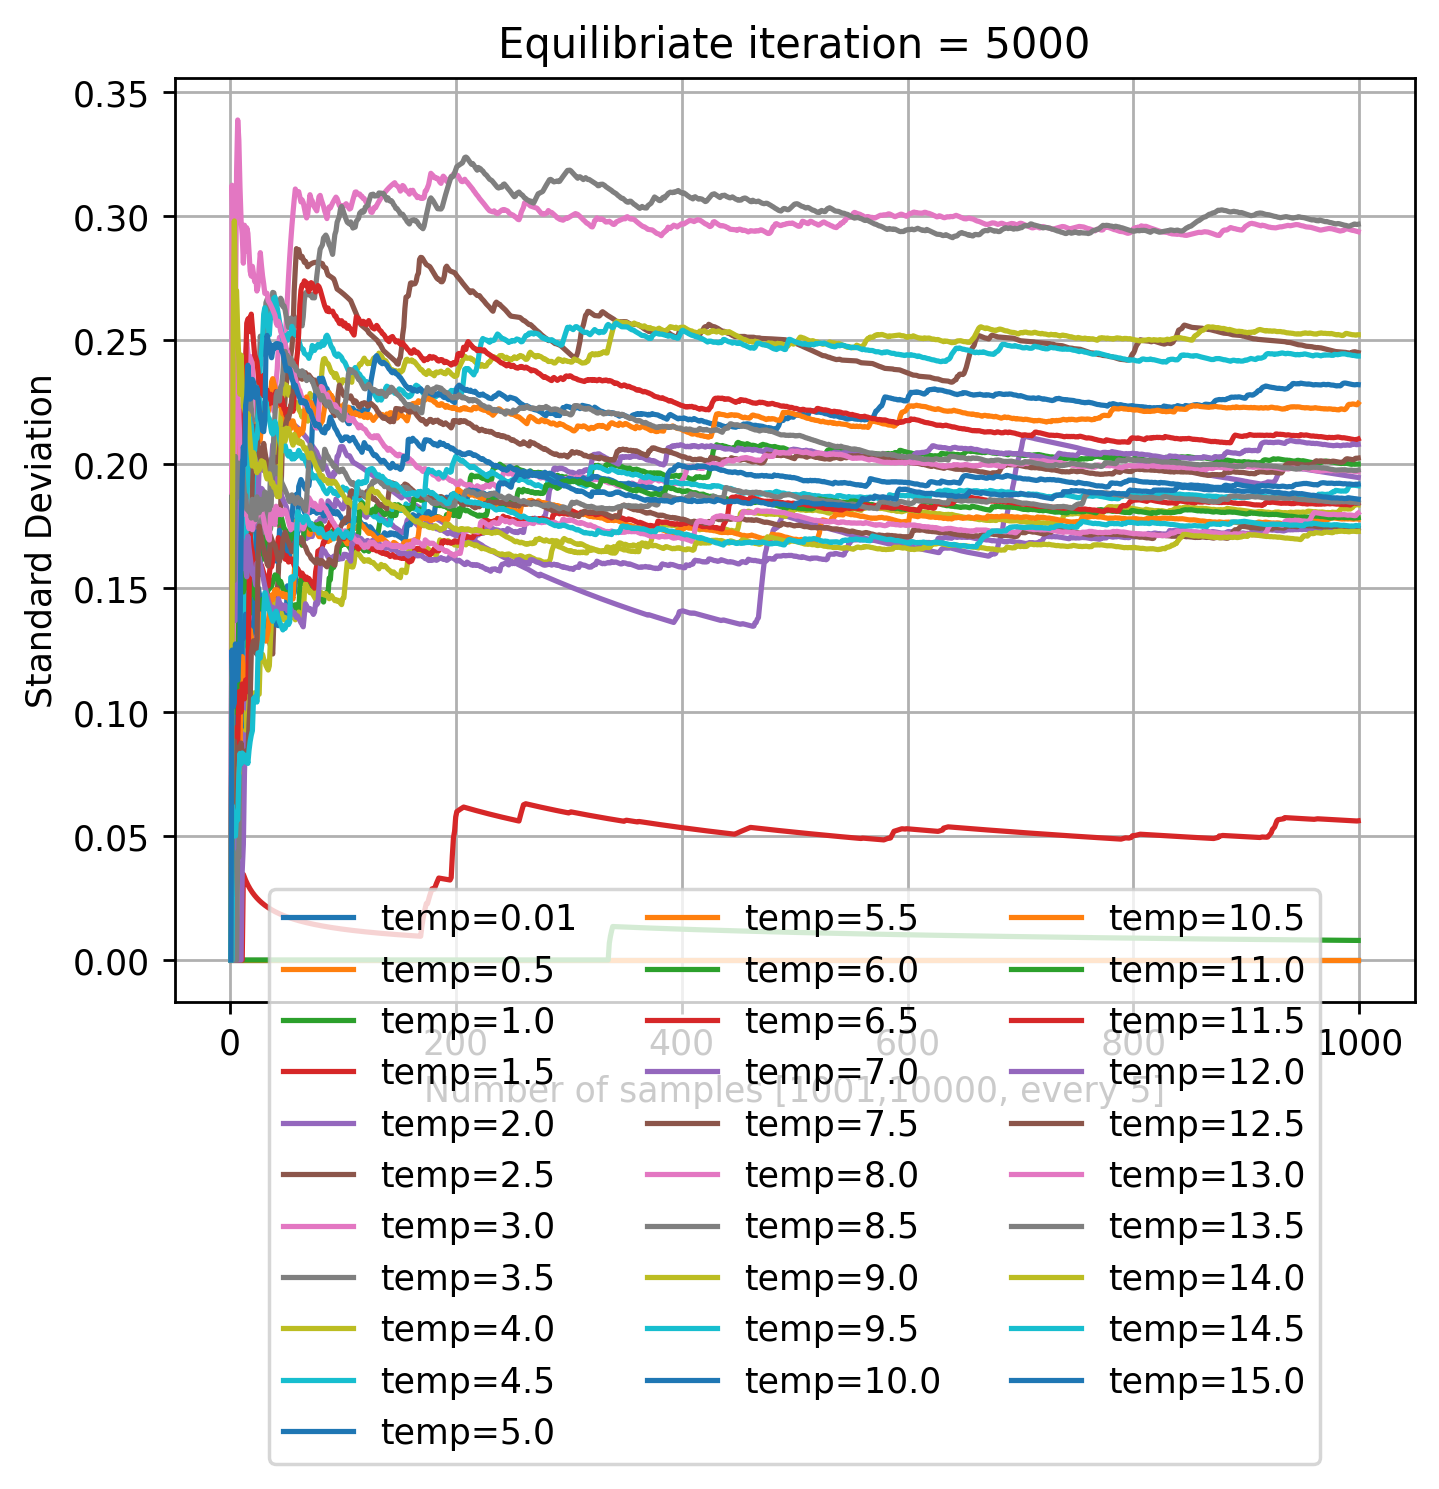

In [13]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::5].tolist()
print(len(samples))
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    print(len(std))
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

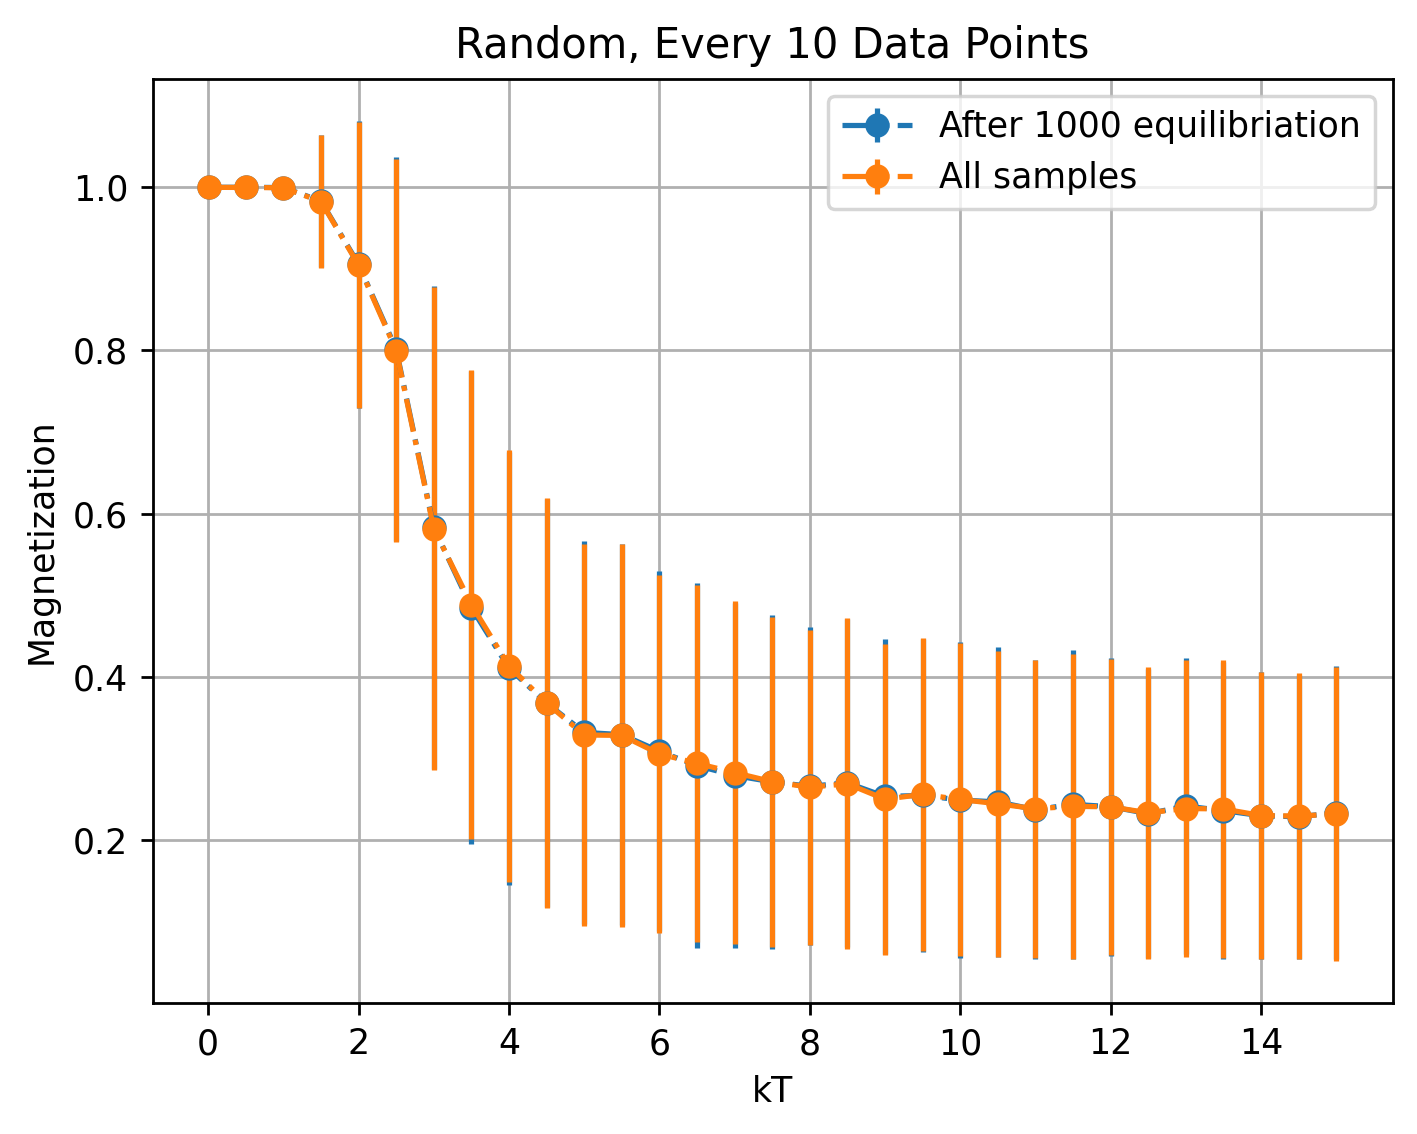

In [15]:
# Every 10th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0, 15, 31)
temps[0] = 0.01
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::10]))
    std.append(np.std(df[key][eqlb::10]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.title('Random, Every 10 Data Points')
plt.grid()

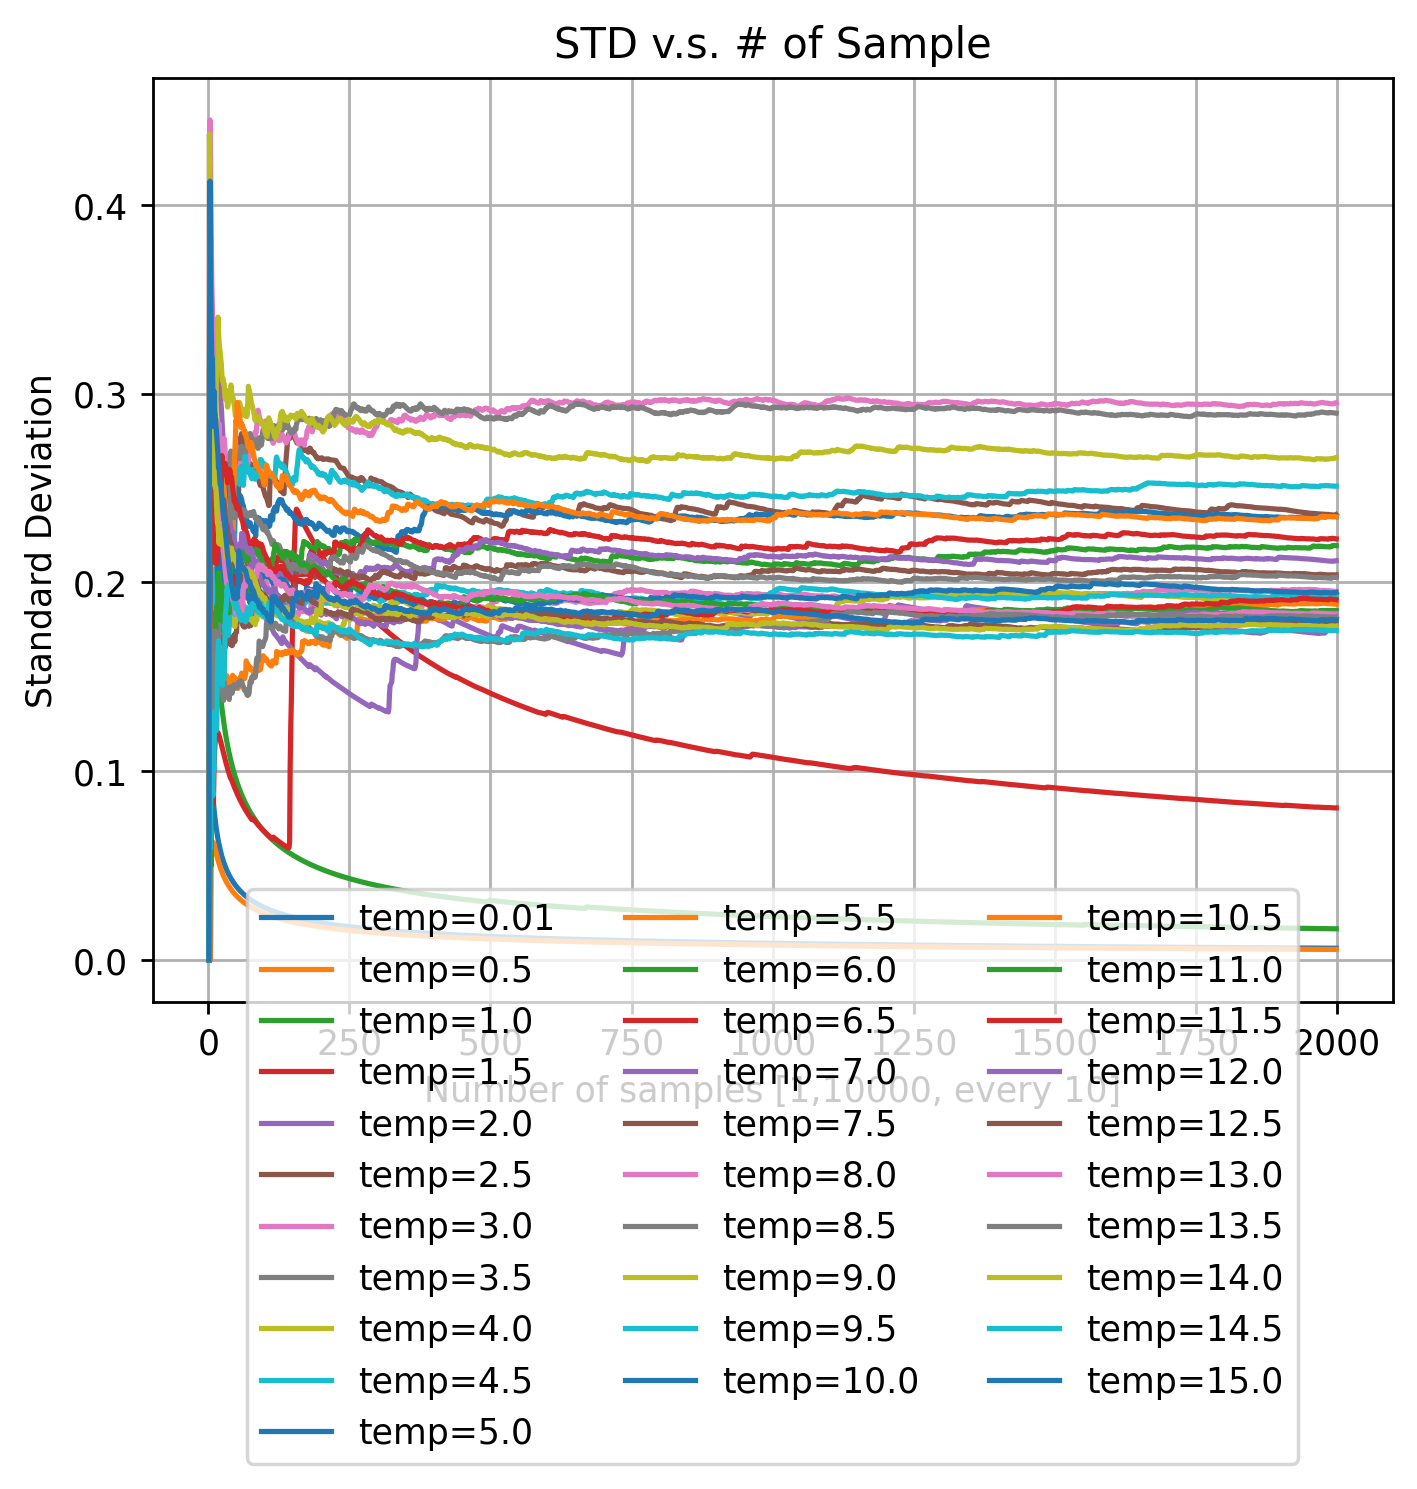

In [16]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::10]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('STD v.s. # of Sample')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

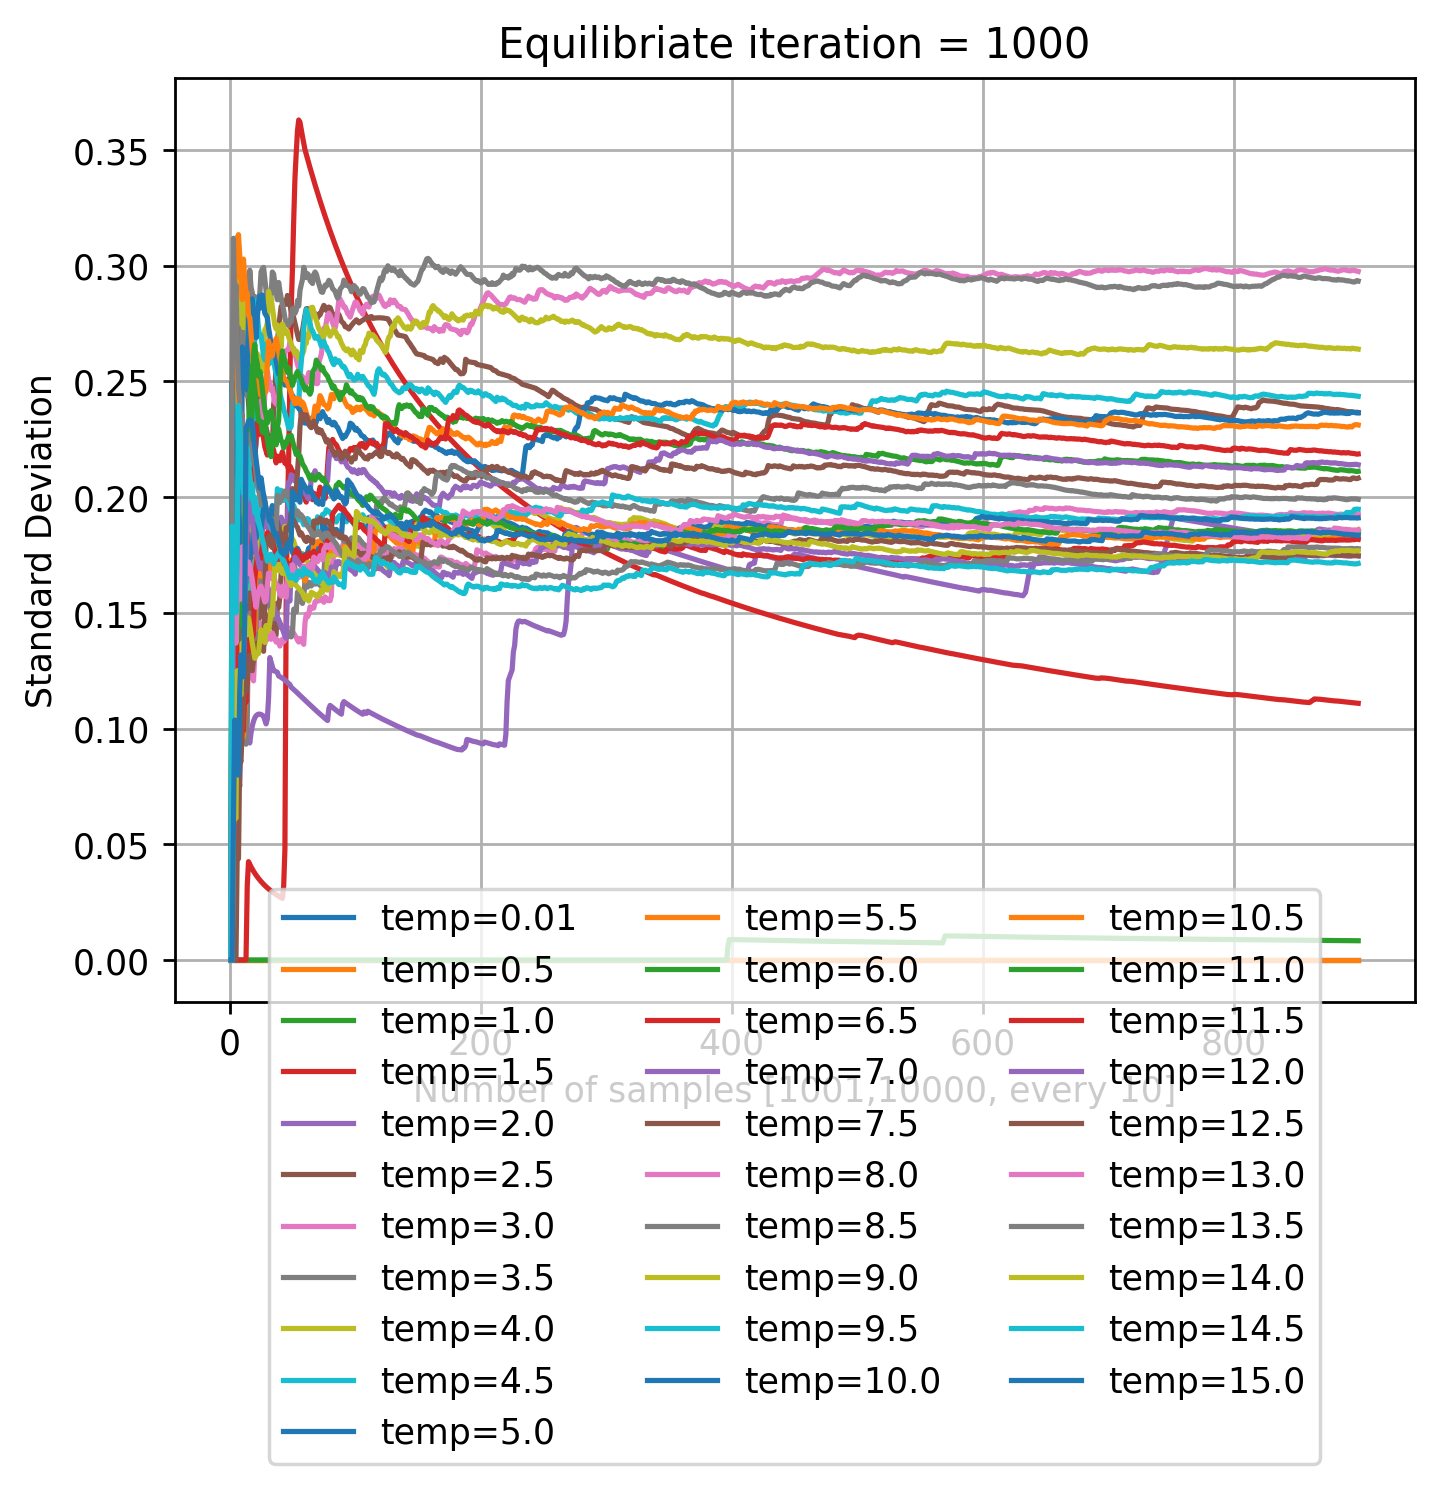

In [17]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::10]
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()